<a href="https://colab.research.google.com/github/meriemdouider1/mois1-mois2/blob/main/FeatureSelection/RELIEfF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.metrics import recall_score

In [2]:
Cl = '/content/apprentissage.xlsx' 
apprentissage= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [3]:
del apprentissage["Source"] 
del apprentissage["CodeSite"] 
apprentissage

,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,...,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,1,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,...,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,...,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,...,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,...,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
4,-13.201560,27.165070,0,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,...,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-5.366667,35.766667,1,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,...,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
199,-5.816667,35.783333,1,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,...,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
200,-5.366667,35.833333,1,7.411978,111.459663,7.364459,15.054404,0.991284,0,0,...,4.5,4.3,4.0,4.0,3.9,4.0,3.9,4.0,3.9,4.3
201,-5.558611,35.841944,1,5.696193,5.641273,0.602672,4.306276,0.000000,0,0,...,4.6,4.0,3.8,4.1,3.7,3.4,3.6,3.6,3.4,3.6


In [4]:
Cl2 = '/content/test.xlsx' 
test= pd.read_excel(Cl2, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [5]:
test

,Source,CodeSite,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,...,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,Bennouna,Z01-S07-G01,-13.185620,27.157940,0,0.000000,0.000000,0.000000,0.000000,0.269410,...,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
1,Bennouna,Z01-S12-G01,-13.214230,27.166700,1,0.000000,0.000000,0.000000,0.000000,0.321313,...,5.4,5.7,5.8,6.2,6.6,6.3,5.8,4.4,3.6,3.8
2,Bennouna,Z01-S12-G02,-13.214230,27.166700,1,0.000000,0.000000,0.000000,0.000000,0.321313,...,5.4,5.7,5.8,6.2,6.6,6.3,5.8,4.4,3.6,3.8
3,Bennouna,Z01-S19-G01,-9.490150,29.219060,1,0.074234,6.159595,0.397598,0.442057,0.172458,...,4.2,4.7,5.7,6.0,4.5,4.4,4.7,3.8,3.2,3.1
4,Bennouna,Z02-S03-G01,-9.553340,30.364340,0,0.000000,0.000000,0.000000,0.000000,0.561624,...,4.0,4.6,4.4,4.5,4.6,4.8,3.6,3.3,3.6,3.3
5,Bennouna,Z02-S03-G02,-9.552312,30.363460,0,0.000000,0.000000,0.000000,0.000000,0.561624,...,4.0,4.6,4.4,4.5,4.6,4.8,3.6,3.3,3.6,3.3
6,Bennouna,Z02-S03-G04,-9.561531,30.357880,0,0.000000,0.000000,0.000000,0.000000,0.401581,...,4.3,4.5,4.3,4.7,4.5,4.7,3.7,3.5,3.7,3.4
7,Bennouna,Z02-S05-G04,-9.478637,30.353610,0,0.000000,0.000000,0.000000,0.000000,0.490648,...,4.0,4.0,4.2,4.3,4.5,4.5,3.5,3.1,3.5,3.1
8,Bennouna,Z02-S10-G01,-8.897921,30.488400,1,4.875471,43.021103,13.582043,20.592701,0.082797,...,2.9,2.7,3.1,3.7,3.9,3.8,2.7,2.2,2.1,2.3
9,Bennouna,Z02-S11-G01,-8.863324,30.546020,0,2.596336,10.381731,8.940304,25.512629,0.170359,...,3.0,3.1,3.5,3.6,4.0,3.9,2.8,2.2,2.2,2.5


In [6]:
X_app = apprentissage.loc[:, apprentissage.columns != 'Cs_longia']
Y_app = apprentissage.Cs_longia
X_test = test.loc[:, test.columns != 'Cs_longia']
Y_test = test.Cs_longia

In [8]:
pip install ITMO_FS

     |████████████████████████████████| 70 kB 4.7 MB/s 
     |████████████████████████████████| 121 kB 23.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for quadprog: filename=quadprog-0.1.11-cp37-cp37m-linux_x86_64.whl size=290751 sha256=ada235c1375094040512a58800aadff0689a4509fe5788adce4b4430b0dd997a
  Stored in directory: /root/.cache/pip/wheels/4a/4e/d7/41034ea11aeef1266df3cae546116cb6094e955c41ae3e2589
Successfully built quadprog


In [9]:
from ITMO_FS.filters.univariate import reliefF_measure

In [10]:
Xapp=X_app.to_numpy()

In [11]:
Xapp

array([[-1.59114200e+01,  2.37947400e+01,  0.00000000e+00, ...,
         5.40000010e+00,  5.50000000e+00,  4.90000010e+00],
       [-1.31883700e+01,  2.71329500e+01,  2.14420957e-04, ...,
         4.30000019e+00,  3.70000005e+00,  3.79999995e+00],
       [-1.31883700e+01,  2.71329500e+01,  2.14420957e-04, ...,
         4.30000019e+00,  3.70000005e+00,  3.79999995e+00],
       ...,
       [-5.36666700e+00,  3.58333330e+01,  7.41197777e+00, ...,
         4.00000000e+00,  3.90000010e+00,  4.30000019e+00],
       [-5.55861100e+00,  3.58419440e+01,  5.69619274e+00, ...,
         3.59999990e+00,  3.40000010e+00,  3.59999990e+00],
       [-5.48333300e+00,  3.59000000e+01,  6.83951378e+00, ...,
         4.00000000e+00,  4.00000000e+00,  4.19999981e+00]])

In [12]:
Yapp=Y_app.to_numpy()

In [13]:
Yapp

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [16]:
scores = reliefF_measure(Xapp, Yapp,k_neighbors=180)

In [17]:
scores

array([0.00851815, 0.0101255 , 0.00793069, 0.00631577, 0.00435222,
       0.01526492, 0.00846258, 0.00272796, 0.01367864, 0.00102201,
       0.00115259, 0.0023422 , 0.0022359 , 0.01014992, 0.00969558,
       0.02450613, 0.00152674, 0.00911652, 0.00994451, 0.01105637,
       0.01039743, 0.01130027, 0.00721139, 0.00467439, 0.00466777,
       0.00716142, 0.01245512, 0.00836224, 0.0159428 , 0.01030074,
       0.00655444, 0.01205186, 0.0029963 , 0.0082868 , 0.00692764,
       0.02178432, 0.00408061, 0.00384623, 0.00732245, 0.00347941,
       0.00305412, 0.00301051, 0.00362065, 0.0065624 , 0.00445733,
       0.00976865, 0.00285956, 0.00704483, 0.00910017, 0.00769646,
       0.00467445, 0.0056774 , 0.00158345, 0.0042014 , 0.00299115,
       0.00297646, 0.0031709 , 0.00650777, 0.00804641, 0.00752256,
       0.01202631, 0.01794044, 0.01241279, 0.01042749, 0.01660443,
       0.00400777, 0.00238785, 0.01529929, 0.00817671, 0.01853411,
       0.00275288, 0.00885456, 0.01019741, 0.01466018, 0.01257

In [18]:
scores_data=pd.DataFrame(scores)

In [19]:
scores_data

,0
0,0.008518
1,0.010126
2,0.007931
3,0.006316
4,0.004352
...,...
220,0.010195
221,0.015816
222,0.014215
223,0.009246


In [20]:
scores_data.to_excel("scores_1.xlsx")

In [21]:
feature_selected=['VegCul', 'Amp3_TempJ','Max_NDVI','Amp1_NDVI','Geom_maj','VarT_ann_NDVI','Prob_R','Vent_Janv','Ph1_IRM','Vent_Sept','VarT_cy_NDVI','Ovins','Max_EVI','Var_NDVI','Vent_Mars','Vent_Dec','Vent_Oct','VarT_cy_EVI','Geom_unif','ZoneAride','VarT_ann_EVI','Amp1_EVI','Rad_Fev']
x_app1=X_app[feature_selected]

In [22]:
x_test1=X_test[feature_selected]

In [23]:
 x_app1

,VegCul,Amp3_TempJ,Max_NDVI,Amp1_NDVI,Geom_maj,VarT_ann_NDVI,Prob_R,Vent_Janv,Ph1_IRM,Vent_Sept,...,Var_NDVI,Vent_Mars,Vent_Dec,Vent_Oct,VarT_cy_EVI,Geom_unif,ZoneAride,VarT_ann_EVI,Amp1_EVI,Rad_Fev
0,0,7,1113,5,1,2,33,4.8,566,6.3,...,7,6.1,4.9,5.4,13,0.579282,97,1,13,17773
1,0,31,1090,6,1,13,20,4.2,581,5.7,...,1,4.8,3.8,4.3,15,1.000000,100,12,34,16620
2,0,31,1090,6,1,13,20,4.2,581,5.7,...,1,4.8,3.8,4.3,15,1.000000,100,12,34,16620
3,0,33,1064,5,8,1,28,4.2,577,5.6,...,20,5.0,3.8,4.2,2,0.109761,100,1,85,16615
4,0,23,1086,2,6,0,35,4.3,612,5.7,...,6,5.1,3.9,4.6,7,0.360532,74,7,89,16646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,39,5,1604,102,6,52,21,4.1,647,4.0,...,100,4.6,4.2,4.0,69,0.205729,0,65,784,11971
199,0,1,1265,34,6,51,23,3.7,593,3.3,...,11,4.6,4.0,3.6,32,0.191262,0,24,182,11863
200,60,6,1612,161,5,84,10,4.0,700,3.9,...,155,4.5,4.3,4.0,81,0.095390,0,79,1050,11905
201,6,0,1375,67,1,37,9,3.9,660,3.6,...,61,4.6,3.6,3.6,30,0.083140,0,26,455,12046


In [24]:
x_test1

,VegCul,Amp3_TempJ,Max_NDVI,Amp1_NDVI,Geom_maj,VarT_ann_NDVI,Prob_R,Vent_Janv,Ph1_IRM,Vent_Sept,...,Var_NDVI,Vent_Mars,Vent_Dec,Vent_Oct,VarT_cy_EVI,Geom_unif,ZoneAride,VarT_ann_EVI,Amp1_EVI,Rad_Fev
0,0,23,1094,4,6,8,37,4.2,600,5.7,...,1,5.1,3.9,4.1,8,0.164062,100,7,17,16659
1,0,25,1088,1,9,1,29,4.2,637,5.8,...,1,5.4,3.8,4.4,2,0.156346,59,1,11,16697
2,0,25,1088,1,9,1,29,4.2,637,5.8,...,1,5.4,3.8,4.4,2,0.156346,59,1,11,16697
3,19,5,1304,53,6,64,17,3.5,634,4.7,...,22,4.2,3.1,3.8,25,0.121335,59,20,86,16221
4,11,22,1616,43,1,50,15,3.3,611,3.6,...,19,4.0,3.3,3.3,15,0.246046,0,13,241,15367
5,11,22,1616,43,1,50,24,3.3,611,3.6,...,19,4.0,3.3,3.3,15,0.246046,0,13,241,15367
6,0,28,1373,66,1,33,24,3.6,642,3.7,...,67,4.3,3.4,3.5,25,0.327064,0,24,395,15397
7,0,28,1400,88,1,55,6,3.4,645,3.5,...,70,4.0,3.1,3.1,47,1.000000,0,43,498,15436
8,24,21,1322,45,1,19,0,2.3,641,2.7,...,53,2.9,2.3,2.2,20,1.000000,24,17,337,15307
9,11,21,1292,53,1,27,4,2.4,667,2.8,...,52,3.0,2.5,2.2,25,1.000000,46,22,334,15340


In [40]:
###Recall
def recall(y_test, preds):
  recall=recall_score(y_test, preds)
  return recall
def MCC(y_test, preds):
  MCC= matthews_corrcoef(y_test, preds) 
  return MCC
### MCC
def MCC(y_test, preds):
  MCC= matthews_corrcoef(y_test, preds) 
  return MCC
### sensibilite
def sensibilite(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  sensibilite =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[1,0])
  return sensibilite
### specifite 
def specifite(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  specifite =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[0,1])
  return specifite 
### kappa
def kappa(y_test, preds):
  value = cohen_kappa_score(y_test, preds)
  return value
### balancedacc
def balancedacc(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  sen = (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[1,0])
  spe = (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[0,1])
  value = (sen + spe)/2
  return value
def présicion_positive(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  pre_pos =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[0,1])
  return pre_pos
def présicion_négative(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  pre_pos =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[1,0])
  return pre_pos
  
### courbe roc
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [41]:
from sklearn.neural_network import MLPClassifier


############################
XGBClassifier
[[17 14]
 [ 9 11]]
MCC: 0.09608980497611282
sensibilité : 0.55
spécificité : 0.5483870967741935
balanced_accuracy : 0.5491935483870968
présicion_négative : 0.6538461538461539
présicion_positive : 0.44
cohen_kappa_scorec : 0.0942084942084942


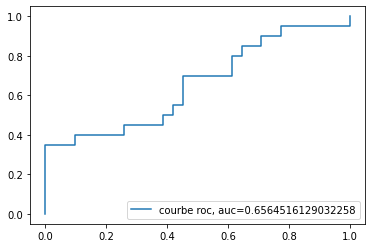

############################
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[23  8]
 [10 10]]
MCC: 0.24717366194506907
sensibilité : 0.5
spécificité : 0.7419354838709677
balanced_accuracy : 0.6209677419354839
présicion_négative : 0.696969696969697
présicion_positive : 0.5555555555555556
cohen_kappa_scorec : 0.24630541871921185


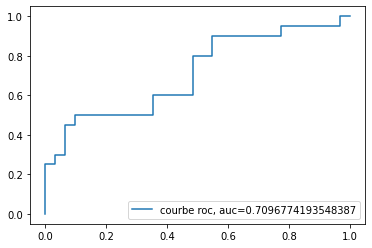

############################
RandomForestClassifier
[[21 10]
 [10 10]]
MCC: 0.1774193548387097
sensibilité : 0.5
spécificité : 0.6774193548387096
balanced_accuracy : 0.5887096774193548
présicion_négative : 0.6774193548387096
présicion_positive : 0.5
cohen_kappa_scorec : 0.17741935483870963


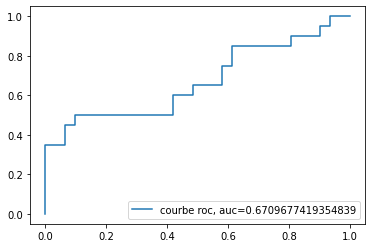

############################
GradientBoostingClassifier
[[24  7]
 [ 8 12]]
MCC: 0.3778682049413561
sensibilité : 0.6
spécificité : 0.7741935483870968
balanced_accuracy : 0.6870967741935483
présicion_négative : 0.75
présicion_positive : 0.631578947368421
cohen_kappa_scorec : 0.3775427176566314


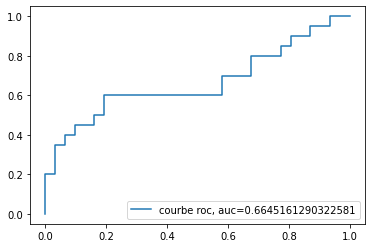

############################
Gaussian
[[19 12]
 [ 9 11]]
MCC: 0.15983894167911267
sensibilité : 0.55
spécificité : 0.6129032258064516
balanced_accuracy : 0.5814516129032259
présicion_négative : 0.6785714285714286
présicion_positive : 0.4782608695652174
cohen_kappa_scorec : 0.15868028279654356


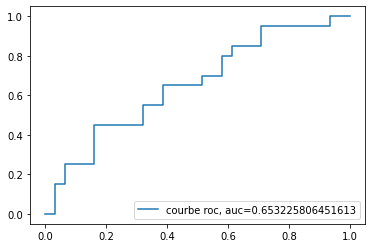

############################
KNN
[[17 14]
 [ 6 14]]
MCC: 0.24371482196617178
sensibilité : 0.7
spécificité : 0.5483870967741935
balanced_accuracy : 0.6241935483870967
présicion_négative : 0.7391304347826086
présicion_positive : 0.5
cohen_kappa_scorec : 0.2319277108433735


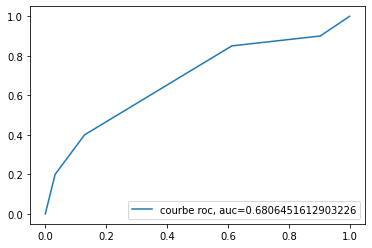

############################
MLPC
[[28  3]
 [13  7]]
MCC: 0.3113951752250226
sensibilité : 0.35
spécificité : 0.9032258064516129
balanced_accuracy : 0.6266129032258064
présicion_négative : 0.6829268292682927
présicion_positive : 0.7
cohen_kappa_scorec : 0.2778761061946903


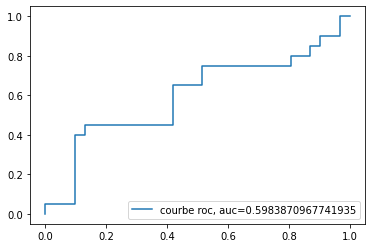

In [47]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.5,max_depth=5,n_estimators=150,objective="binary:logistic"),
"LogisticRegression": LogisticRegression(max_iter=1500, solver='lbfgs', class_weight='balanced'),
"RandomForestClassifier": RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5 ,min_samples_split=3),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=3, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1 ),
"Gaussian":GaussianNB(),
"KNN":KNeighborsClassifier(n_neighbors=5),
"MLPC":MLPClassifier(hidden_layer_sizes=100,max_iter=300)
}
for name, clf in classifiers.items():
    print("############################")
    print(name)
    # fit the model
    clf.fit(x_app1,Y_app)
    # fit the model 
    preds = clf.predict(x_test1)
    cf_matrix = confusion_matrix(Y_test, preds)
    print(cf_matrix)
    # report performance
    print('MCC:', MCC(Y_test, preds))
    print('sensibilité :',sensibilite(Y_test, preds))
    print('spécificité :',specifite(Y_test, preds))
    print('balanced_accuracy :',balancedacc(Y_test, preds))
    print('présicion_négative :',présicion_négative(Y_test, preds))
    print('présicion_positive :',présicion_positive(Y_test, preds))
    print('cohen_kappa_scorec :',kappa(Y_test, preds))
    y_pred_proba = clf.predict_proba(x_test1)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="courbe roc, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()


----------------------------------------

In [49]:
scores2 = reliefF_measure(Xapp, Yapp,k_neighbors=1)

In [50]:
scores2

array([ 0.02290631,  0.01605369,  0.01768797,  0.01655908,  0.01850085,
        0.02163388,  0.01634948,  0.01459873,  0.02587746, -0.00503139,
       -0.01899566, -0.00612253,  0.02374681,  0.02647014,  0.06100763,
        0.03329177, -0.00537394,  0.03543052,  0.02010465,  0.00219033,
        0.02766106,  0.03235173,  0.02028862,  0.03854387,  0.02239327,
        0.02000442,  0.0253819 ,  0.01502566,  0.0094354 ,  0.01545834,
        0.02883234,  0.01211002, -0.00201093,  0.02500498,  0.02705038,
        0.05812572,  0.00405648,  0.01932739,  0.08348727,  0.00048855,
       -0.00313002, -0.00142504, -0.00227169,  0.01976137,  0.03907533,
        0.03109648, -0.00424988,  0.01735833,  0.01575849,  0.02318137,
        0.00396789,  0.02310396,  0.01211002,  0.00058743, -0.00378895,
       -0.00386909, -0.00103028,  0.02289122,  0.00753642,  0.0179217 ,
        0.0014881 ,  0.00205935,  0.01159187,  0.03113271,  0.0334125 ,
        0.01079612,  0.01877117,  0.02052771,  0.00117409, -0.00

In [51]:
scores_data2=pd.DataFrame(scores2)

In [52]:
scores_data2

,0
0,0.022906
1,0.016054
2,0.017688
3,0.016559
4,0.018501
...,...
220,0.039293
221,0.054703
222,0.044234
223,0.034587


In [53]:
scores_data2.to_excel("scores_2.xlsx")

In [54]:
feature_selected2=['Vent_Avril', 'IPT_Med','Tmax_Janv','Prec_Juin','Bio_Tmin','Vent_Mars','Prec_Avril','Pente_Min','RV_sd','Tmax_Oct','VarT_tri_TempN','ZonePel','Tmax_Aout','Rad_Mai','Var_TempN','Rugosite_Max','IR_Min','IR_Med','Prec_Janv','Vent_Nov','VegInond','Rugosite_Min','IPT_Min']
x_app2=X_app[feature_selected2]

In [55]:
x_test2=X_test[feature_selected2]

In [56]:
 x_app2

,Vent_Avril,IPT_Med,Tmax_Janv,Prec_Juin,Bio_Tmin,Vent_Mars,Prec_Avril,Pente_Min,RV_sd,Tmax_Oct,...,Rad_Mai,Var_TempN,Rugosite_Max,IR_Min,IR_Med,Prec_Janv,Vent_Nov,VegInond,Rugosite_Min,IPT_Min
0,6.9,-0.1875,21.5,0,14.5,6.1,1,0.123749,0.000018,26.000000,...,24920,3,9,0.625,1.6250,2,5.5,0,3,-1.750
1,5.6,-0.5000,21.9,1,12.0,4.8,1,0.043752,0.000005,27.600000,...,24082,9,8,0.875,1.3750,3,3.7,0,2,-2.125
2,5.6,-0.5000,21.9,1,12.0,4.8,1,0.043752,0.000005,27.600000,...,24082,9,8,0.875,1.3750,3,3.7,0,2,-2.125
3,5.2,-3.7500,22.0,1,12.4,5.0,1,0.333201,0.000162,27.799999,...,24002,9,43,2.375,6.1250,3,3.6,0,8,-7.250
4,5.6,-0.6250,22.1,1,12.2,5.1,1,1.701891,0.000122,27.799999,...,24067,8,34,5.625,8.7500,3,3.8,0,18,-6.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,4.3,1.3125,15.2,7,9.4,4.6,58,5.809525,0.001325,22.100000,...,23341,19,109,21.500,25.1875,125,4.0,0,62,-6.875
199,4.1,1.6250,14.5,13,9.6,4.6,65,0.745026,0.000190,22.400000,...,23582,21,28,4.625,5.9375,113,3.8,0,12,-7.375
200,4.3,2.2500,15.3,7,9.4,4.5,58,2.375778,0.000252,22.000000,...,23425,17,70,10.125,15.5000,121,3.9,0,32,-13.500
201,4.0,-2.0000,16.6,7,8.5,4.6,62,0.043752,0.001521,22.299999,...,23716,0,65,0.125,11.8750,132,3.4,11,1,-13.750


In [57]:
x_test2

,Vent_Avril,IPT_Med,Tmax_Janv,Prec_Juin,Bio_Tmin,Vent_Mars,Prec_Avril,Pente_Min,RV_sd,Tmax_Oct,...,Rad_Mai,Var_TempN,Rugosite_Max,IR_Min,IR_Med,Prec_Janv,Vent_Nov,VegInond,Rugosite_Min,IPT_Min
0,5.6,1.5625,21.900000,1,12.3,5.1,1,1.057192,9.712223e-05,27.600000,...,24019,8,41,6.000,9.4375,3,3.7,0,19,-7.125
1,5.7,-1.9375,22.200001,1,12.1,5.4,1,0.175007,4.126414e-04,28.000000,...,24067,7,50,1.375,11.8125,3,3.6,0,6,-18.125
2,5.7,-1.9375,22.200001,1,12.1,5.4,1,0.175007,4.126414e-04,28.000000,...,24067,7,50,1.375,11.8125,3,3.6,0,6,-18.125
3,4.7,-0.4375,16.600000,2,4.3,4.2,15,1.898861,2.315721e-04,24.200001,...,23917,29,48,6.375,9.5625,23,3.2,0,20,-10.875
4,4.6,-1.7500,18.200001,2,9.8,4.0,15,0.000000,2.032181e-05,25.900000,...,23508,12,13,1.375,2.9375,37,3.6,0,5,-3.500
5,4.6,-1.7500,18.200001,2,9.8,4.0,15,0.000000,2.032181e-05,25.900000,...,23508,12,13,1.375,2.9375,37,3.6,0,5,-3.500
6,4.5,-0.3125,18.200001,2,9.8,4.3,15,0.043752,4.788581e-05,25.700001,...,23453,12,17,0.375,1.7500,36,3.7,0,1,-5.250
7,4.0,-0.1875,18.799999,2,9.3,4.0,15,0.138355,1.615365e-06,27.000000,...,23530,14,6,0.500,1.3125,36,3.5,0,2,-1.625
8,2.7,0.3750,19.600000,2,7.1,2.9,19,0.276709,4.746831e-06,27.400000,...,23515,22,7,0.875,1.4375,41,2.1,0,2,-1.000
9,3.1,-0.3750,19.700001,2,6.5,3.0,20,0.471211,1.210015e-06,27.500000,...,23714,24,9,1.375,1.8750,41,2.2,0,5,-1.000


############################
XGBClassifier
[[21 10]
 [ 5 15]]
MCC: 0.4174393166995065
sensibilité : 0.75
spécificité : 0.6774193548387096
balanced_accuracy : 0.7137096774193548
présicion_négative : 0.8076923076923077
présicion_positive : 0.6
cohen_kappa_scorec : 0.4092664092664092


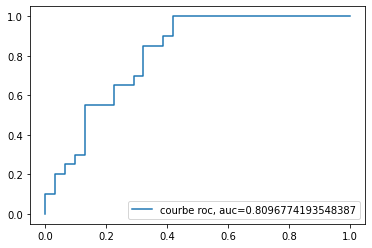

############################
LogisticRegression
[[16 15]
 [11  9]]
MCC: -0.03313110699774545
sensibilité : 0.45
spécificité : 0.5161290322580645
balanced_accuracy : 0.48306451612903223
présicion_négative : 0.5925925925925926
présicion_positive : 0.375
cohen_kappa_scorec : -0.032710280373831724


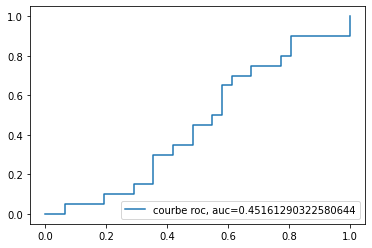

############################
RandomForestClassifier
[[21 10]
 [ 7 13]]
MCC: 0.3212604471372264
sensibilité : 0.65
spécificité : 0.6774193548387096
balanced_accuracy : 0.6637096774193548
présicion_négative : 0.75
présicion_positive : 0.5652173913043478
cohen_kappa_scorec : 0.31893165750196384


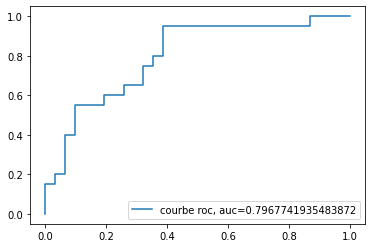

############################
GradientBoostingClassifier
[[23  8]
 [ 3 17]]
MCC: 0.5781140725612034
sensibilité : 0.85
spécificité : 0.7419354838709677
balanced_accuracy : 0.7959677419354838
présicion_négative : 0.8846153846153846
présicion_positive : 0.68
cohen_kappa_scorec : 0.5667953667953668


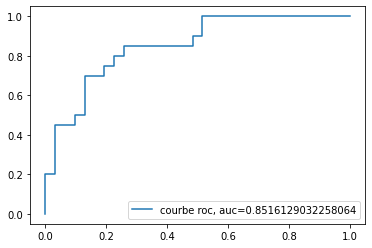

############################
Gaussian
[[23  8]
 [15  5]]
MCC: -0.009034636527079542
sensibilité : 0.25
spécificité : 0.7419354838709677
balanced_accuracy : 0.4959677419354839
présicion_négative : 0.6052631578947368
présicion_positive : 0.38461538461538464
cohen_kappa_scorec : -0.008598452278589797


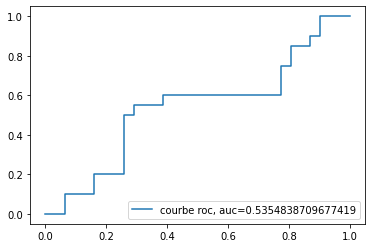

############################
KNN
[[23  8]
 [12  8]]
MCC: 0.14934573132646872
sensibilité : 0.4
spécificité : 0.7419354838709677
balanced_accuracy : 0.5709677419354839
présicion_négative : 0.6571428571428571
présicion_positive : 0.5
cohen_kappa_scorec : 0.1471571906354514


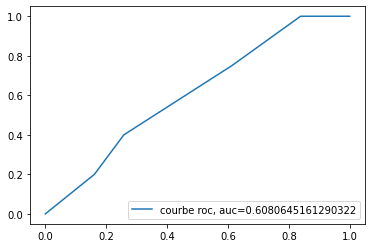

############################
MLPC
[[ 0 31]
 [ 0 20]]
MCC: 0.0
sensibilité : 1.0
spécificité : 0.0
balanced_accuracy : 0.5
présicion_négative : nan
présicion_positive : 0.39215686274509803
cohen_kappa_scorec : 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in long_scalars


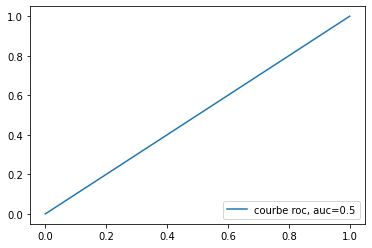

In [58]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.5,max_depth=5,n_estimators=150,objective="binary:logistic"),
"LogisticRegression": LogisticRegression(max_iter=1500, solver='lbfgs', class_weight='balanced'),
"RandomForestClassifier": RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5 ,min_samples_split=3),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=3, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1 ),
"Gaussian":GaussianNB(),
"KNN":KNeighborsClassifier(n_neighbors=5),
"MLPC":MLPClassifier(hidden_layer_sizes=100,max_iter=300)
}
for name, clf in classifiers.items():
    print("############################")
    print(name)
    # fit the model
    clf.fit(x_app2,Y_app)
    # fit the model 
    preds = clf.predict(x_test2)
    cf_matrix = confusion_matrix(Y_test, preds)
    print(cf_matrix)
    # report performance
    print('MCC:', MCC(Y_test, preds))
    print('sensibilité :',sensibilite(Y_test, preds))
    print('spécificité :',specifite(Y_test, preds))
    print('balanced_accuracy :',balancedacc(Y_test, preds))
    print('présicion_négative :',présicion_négative(Y_test, preds))
    print('présicion_positive :',présicion_positive(Y_test, preds))
    print('cohen_kappa_scorec :',kappa(Y_test, preds))
    y_pred_proba = clf.predict_proba(x_test2)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="courbe roc, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
